In [1]:
from epoch_viz.viz import EpochViz
import numpy as np
import matplotlib.pyplot as plt

In [16]:
ez = EpochViz("run_5", ".temp")
ez.print_info()

Here are the some infomation about the data in the directory: run_5

Total number of sdf files: 2225
------------------------------------------------------------
Available data inside the sdf files:
	Ey	Ne	N
------------------------------------------------------------
Input deck information:
	Wavelength (m): 1.0000e-06
	Laser Width (tau): 2.0000e+01
	Max Time (tau): 4.0000e+01
	Dump Time Step (s): 6.0000e-17
	Normalized Vector Potential: 1.0000e+00
	Density Factor: 5.0000e+00
	Number of Grid Points: 2.1000e+04
	Minimum X (wavelength): -2.0000e+01
	Maximum X (wavelength): 1.0000e+01
	Thickness of Plasma (wavelength): 1.0000e+00
	Particles per Cell: 1.0000e+02
	Start Position of Plasma (wavelength): 0.0000e+00
	Temperature of Plasma (eV): 5.0000e+01
------------------------------------------------------------
Calculated Parameters:
	Box Size (m): 3.0000e-05
	Grid Spacing (m): 1.4286e-09
	Time Step (s): 4.5269e-18
	Run Time (s): 1.3343e-13
	Laser Frequency (Hz): 1.8837e+15
	Laser Width (s

Data is not loaded. Loading data...


Loading Data...: 100%|██████████| 222/222 [00:00<00:00, 253.96it/s]


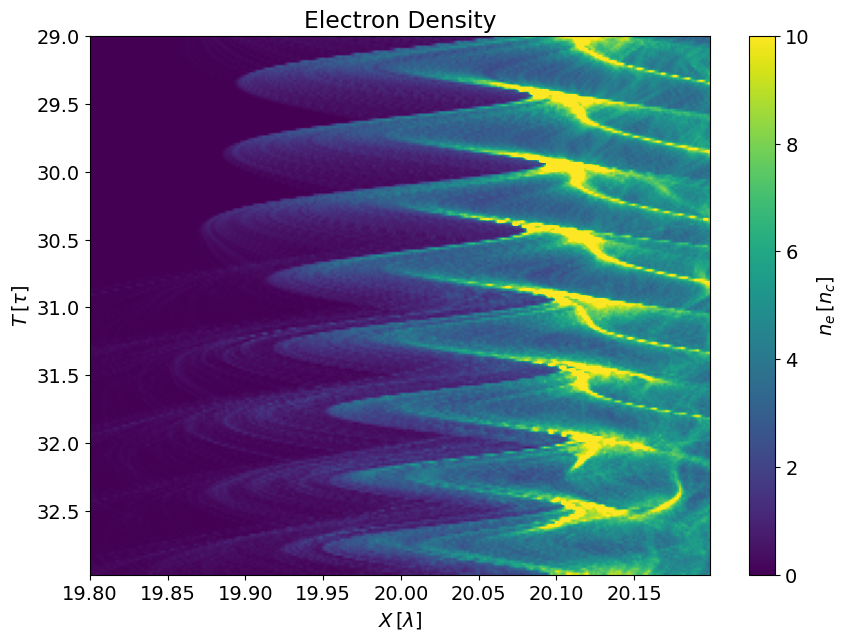

In [17]:
time_range = (29.0, 33.0)
space_range = (19.8, 20.2)
times_are_nodes = False
space_are_nodes = False
fig, ax = ez.plot_density_image(
    normalize=True,
    time_range=time_range,
    space_range=space_range,
    times_are_nodes=times_are_nodes,
    space_are_nodes=space_are_nodes,
    cmap = "viridis",
    aspect="auto",
    show_fig=False,
    vmax = 10,
    vmin = 0,
)

In [4]:
Ts = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], ez.time_nodes.shape[0])
Xs = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], ez.space_nodes.shape[0])
Ts = Ts[::-1]

In [116]:
from scipy.signal import hilbert as hilbert

In [117]:
h = hilbert(ez.data["Ne"])
h = np.abs(h)

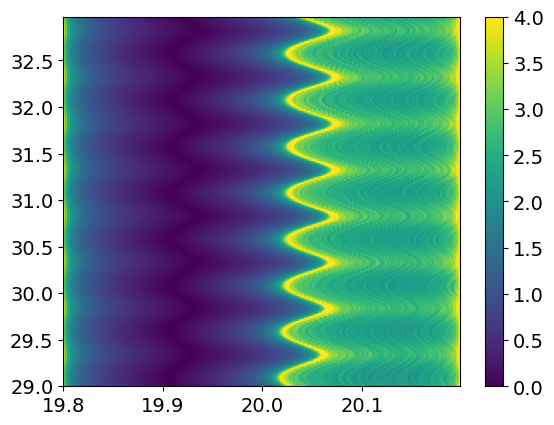

In [118]:
plt.imshow(h, extent=[Xs[0], Xs[-1], Ts[0], Ts[-1]], aspect="auto", cmap="viridis", vmax=4, vmin=0)
plt.cm.ScalarMappable(cmap="viridis")
plt.colorbar()

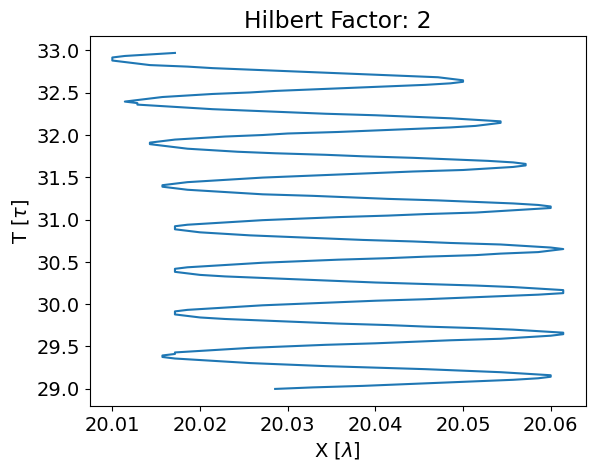

In [119]:
hilbert = np.zeros(h.shape[0], dtype=int)
for i in range(h.shape[0]):
    nonzeros = np.where(h[i]>2)[0]
    if len(nonzeros) > 0:
        nonzeros_f = nonzeros[nonzeros > 50]
        hilbert[i] = nonzeros_f[0]

plt.plot(Xs[hilbert], Ts)
# plt.xlim(Xs[0]-0.1, Xs[-1])
plt.xlabel("X $[\lambda]$")
plt.ylabel(r"T $[\tau]$")
plt.title(f"Hilbert Factor: {ez.deck_info['FACTOR']}");

In [13]:
grad = np.gradient(ez.data["Ne"][1, :])
max(grad)

0.5473026751568313

In [18]:
grad = np.gradient(ez.data["Ne"][0, :])
print(grad.shape), max(grad)

(280,)


(None, 1.6185025897649923)

In [8]:
max(grad)

0.5473026751568313

Text(0.5, 1.0, 'Gradient Factor: 2')

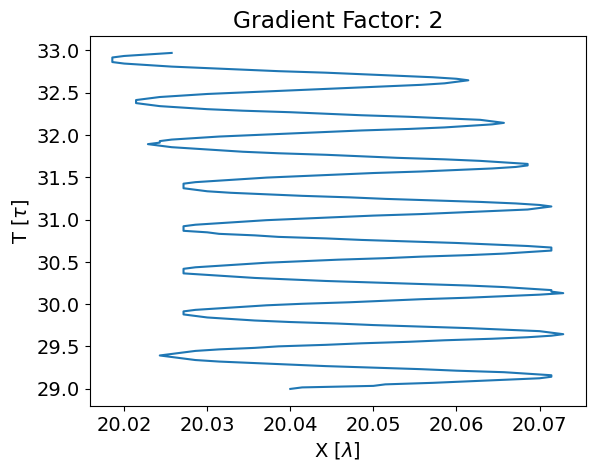

In [120]:
grad = np.gradient(ez.data["Ne"])
max_grad = np.argmax(grad[1], axis=1)
plt.plot(Xs[max_grad], Ts)
plt.xlabel("X $[\lambda]$")
plt.ylabel(r"T $[\tau]$")
plt.title(f"Gradient Factor: {ez.deck_info['FACTOR']}")


In [121]:
ez.data["Ne"][i].max()

2.6661847955697793

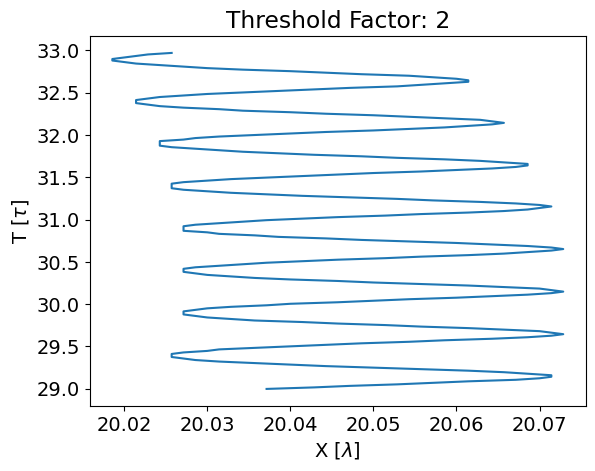

In [122]:
first = np.zeros(ez.data["Ne"].shape[0], dtype=int)
for i in range(ez.data["Ne"].shape[0]):
    nonzeros = np.where(ez.data["Ne"][i]>ez.deck_info["FACTOR"]/2)[0]
    if len(nonzeros) > 0:
        first[i] = nonzeros[0]

plt.plot(Xs[first], Ts)
plt.xlabel("X $[\lambda]$")
plt.ylabel(r"T $[\tau]$")
plt.title(f"Threshold Factor: {ez.deck_info['FACTOR']}");

In [125]:
mean = (0.5*Xs[max_grad] + 1.5*Xs[hilbert] + 3*Xs[first])/5

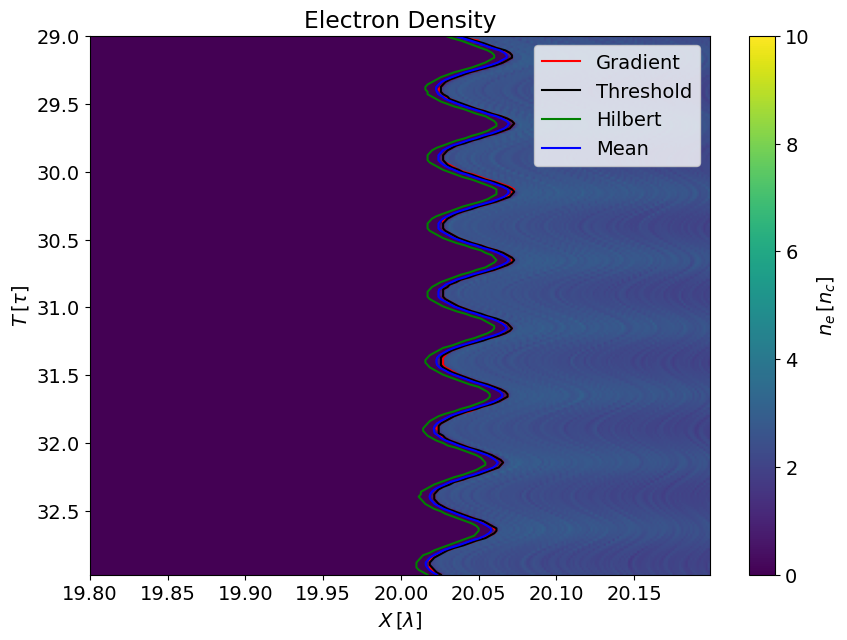

In [126]:
ax.lines.clear()
ax.plot(Xs[max_grad], Ts, color="red", linewidth=1.5, label="Gradient")
ax.plot(Xs[first], Ts, color="black", linewidth=1.5, label="Threshold")
ax.plot(Xs[hilbert], Ts, color="green", linewidth=1.5, label="Hilbert")
ax.plot(mean, Ts, color="blue", linewidth=1.5, label="Mean")
ax.legend()
fig

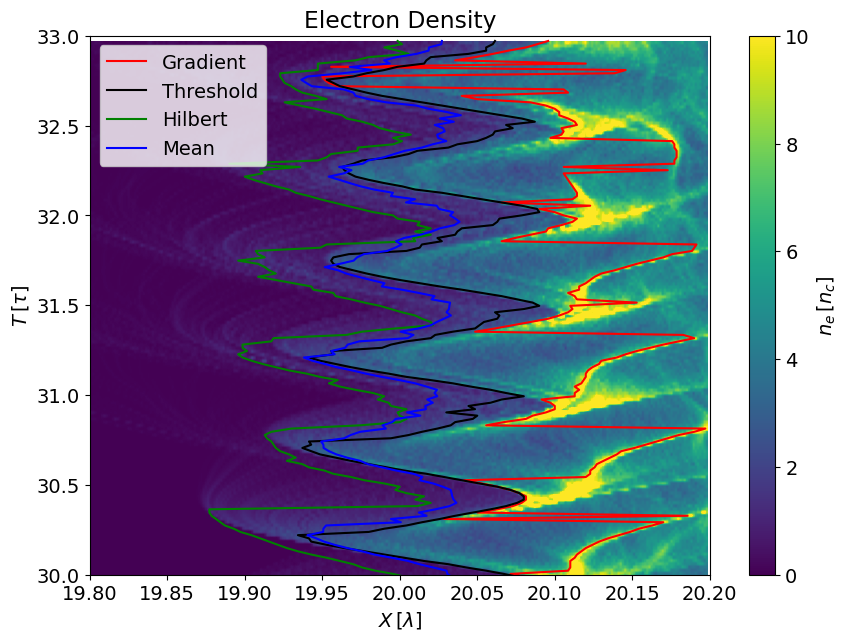

In [99]:
ax.lines.clear()
ax.plot(Xs[max_grad], Ts, color="red", linewidth=1.5, label="Gradient")
ax.plot(Xs[first], Ts, color="black", linewidth=1.5, label="Threshold")
ax.plot(Xs[hilbert], Ts, color="green", linewidth=1.5, label="Hilbert")
ax.plot(mean, Ts, color="blue", linewidth=1.5, label="Mean")
ax.legend()
fig

In [70]:
import os

In [71]:
dirs = os.listdir()

In [72]:
dirs = [dir for dir in dirs if os.path.isdir(dir)]
dirs[4:]

['run_10',
 'run_11',
 'run_12',
 'run_13',
 'run_14',
 'run_2',
 'run_3',
 'run_4',
 'run_5',
 'run_6',
 'run_7',
 'run_8',
 'run_9',
 'spatial']

In [73]:
import os

In [74]:
dirs = os.listdir()
dirs = [dir for dir in dirs if os.path.isdir(dir)]

In [75]:
dirs

['.ipynb_checkpoints',
 'density_images',
 'images',
 'run_1',
 'run_10',
 'run_11',
 'run_12',
 'run_13',
 'run_14',
 'run_2',
 'run_3',
 'run_4',
 'run_5',
 'run_6',
 'run_7',
 'run_8',
 'run_9',
 'spatial']